In [2]:
import numpy as np
import matplotlib.pyplot as plt

def onsager(z, r, tau, n):
    return (z/n) * np.sum(eta(r, tau) != 0)

def eta(u, T):
    return (u - T)*(u >= T) + (u + T)*(u <= -T)

In [28]:
n = 300
N = 1024
k = 40
avg_over = 200 
num_iterations = 100
s = 0.2
lambda_ = 0.1

# create k sparse x vector
x = np.zeros((N, 1))
idx_nonzero_entries = np.random.permutation(N)[0:k]
x[idx_nonzero_entries] = 1

A = np.sqrt(1/n)*np.random.randn(n, N)
y = A @ x  

mse_vs_iterations = np.zeros(num_iterations)

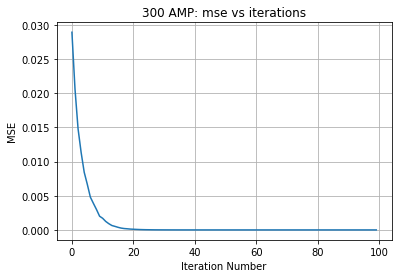

n = 300 | N = 1024 | k = 40


In [29]:
# Prep for IST/AMP
z = np.zeros(y.shape)
xHt = np.zeros(x.shape)
r = 0
tau = 0

#6 AMP n = 200
for idx_iter in range(num_iterations):
    ons = onsager(z, r, tau, n) #calulate next onsager
    z = y - A @ xHt + ons
    tau = np.sqrt((1/n)) * np.linalg.norm(z)
    r = xHt + A.T @ z
    xHt = eta(r, tau)

    # find the current error
    mse_vs_iterations[idx_iter] = (1/N) * np.sum((x - xHt)**2)


# Plot results
plt.figure()
plt.plot(range(num_iterations), mse_vs_iterations)
plt.xlabel('Iteration Number')
plt.ylabel('MSE')
plt.grid(True, which='both')
plt.title(f"{n} AMP: mse vs iterations")
plt.show()
print(f"n = {n} | N = {N} | k = {k}")

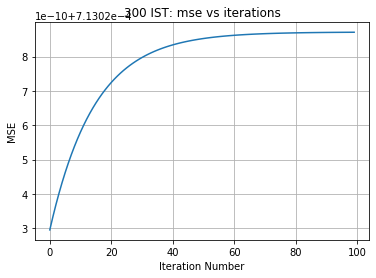

n = 300 | N = 1024 | k = 40


In [33]:
mse_vs_iter = np.zeros(num_iterations)

for idx_iter in range(num_iterations):
    z = y - A @ xHt
    r = xHt + s * A.T @ z
    xHt = eta(r, s*lambda_)
    # find the current error
    mse_vs_iter[idx_iter] = (1/N) * np.sum((x - xHt)**2)
    
# Plot results
plt.figure()
plt.plot(range(num_iterations), mse_vs_iter)
plt.xlabel('Iteration Number')
plt.ylabel('MSE')
plt.grid(True, which='both')
plt.title(f"{n} IST: mse vs iterations")
plt.show()
print(f"n = {n} | N = {N} | k = {k}")